In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df =pd.read_csv(r"D:\Shrabani.Personal\Data Science Course\Machine Learning\PCA and LDA Handson\Homework\csgo.csv")
df.head()


,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0,0,de_dust2,False,500,500,0,0,4000,...,0,0,0,0,0,0,0,0,0,CT
1,156.03,0,0,de_dust2,False,500,500,400,300,600,...,0,0,2,0,0,0,0,0,0,CT
2,96.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,2,0,0,0,0,0,0,CT
3,76.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,0,0,0,0,0,0,0,CT
4,174.97,1,0,de_dust2,False,500,500,192,0,18350,...,0,0,0,0,0,0,0,0,0,CT


In [91]:
df.shape

(122410, 97)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  int64  
 2   t_score                       122410 non-null  int64  
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  int64  
 6   t_health                      122410 non-null  int64  
 7   ct_armor                      122410 non-null  int64  
 8   t_armor                       122410 non-null  int64  
 9   ct_money                      122410 non-null  int64  
 10  t_money                       122410 non-null  int64  
 11  ct_helmets                    122410 non-null  int64  
 12  t_helmets                     122410 non-nul

In [95]:
df.isnull().sum()

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

In [97]:
df.duplicated().sum()

4962

In [99]:
df_no_duplicates = df.drop_duplicates()
df_no_duplicates.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0,0,de_dust2,False,500,500,0,0,4000,...,0,0,0,0,0,0,0,0,0,CT
1,156.03,0,0,de_dust2,False,500,500,400,300,600,...,0,0,2,0,0,0,0,0,0,CT
2,96.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,2,0,0,0,0,0,0,CT
3,76.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,0,0,0,0,0,0,0,CT
4,174.97,1,0,de_dust2,False,500,500,192,0,18350,...,0,0,0,0,0,0,0,0,0,CT


In [101]:
df_no_duplicates.shape

(117448, 97)

In [103]:
df_no_duplicates.duplicated().sum()

0

In [105]:
df_no_duplicates.round_winner.unique()

array(['CT', 'T'], dtype=object)

In [111]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df_no_duplicates.columns:
    if (df_no_duplicates[i].dtypes== object) & (df_no_duplicates[i].dtypes== bool):
        df_no_duplicates[i]=le.fit_transform (df_no_duplicates[i])

In [113]:
df_no_duplicates.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,10781,0,0,1,0,500,500,0,0,4000,...,0,0,0,0,0,0,0,0,0,0
1,9325,0,0,1,0,500,500,400,300,600,...,0,0,2,0,0,0,0,0,0,0
2,7766,0,0,1,0,391,400,294,200,750,...,0,0,2,0,0,0,0,0,0,0
3,6217,0,0,1,0,391,400,294,200,750,...,0,0,0,0,0,0,0,0,0,0
4,10779,1,0,1,0,500,500,192,0,18350,...,0,0,0,0,0,0,0,0,0,0


In [115]:
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117448 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   time_left                     117448 non-null  int64
 1   ct_score                      117448 non-null  int64
 2   t_score                       117448 non-null  int64
 3   map                           117448 non-null  int32
 4   bomb_planted                  117448 non-null  int64
 5   ct_health                     117448 non-null  int64
 6   t_health                      117448 non-null  int64
 7   ct_armor                      117448 non-null  int64
 8   t_armor                       117448 non-null  int64
 9   ct_money                      117448 non-null  int64
 10  t_money                       117448 non-null  int64
 11  ct_helmets                    117448 non-null  int64
 12  t_helmets                     117448 non-null  int64
 13  ct_defuse_kits     

In [117]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_scaled=sc.fit_transform(df_no_duplicates)
df_scaled

array([[ 1.25601278, -1.4096717 , -1.4131151 , ..., -0.16321956,
        -0.15480545, -1.02094333],
       [ 0.78246344, -1.4096717 , -1.4131151 , ..., -0.16321956,
        -0.15480545, -1.02094333],
       [ 0.27541438, -1.4096717 , -1.4131151 , ..., -0.16321956,
        -0.15480545, -1.02094333],
       ...,
       [ 0.75481805,  0.88093134,  1.69091536, ..., -0.16321956,
        -0.15480545,  0.9794863 ],
       [ 0.24646803,  0.88093134,  1.69091536, ..., -0.16321956,
        -0.15480545,  0.9794863 ],
       [-0.25472671,  0.88093134,  1.69091536, ..., -0.16321956,
        -0.15480545,  0.9794863 ]])

In [119]:
df_scaled.shape

(117448, 97)

In [121]:
df_scaled.T.shape

(97, 117448)

In [123]:
cov_mat=np.cov(df_scaled.T)
cov_mat

array([[ 1.00000851,  0.01514307,  0.0057054 , ...,  0.02672999,
         0.02850853, -0.08432136],
       [ 0.01514307,  1.00000851,  0.62975257, ..., -0.01105391,
        -0.00530229, -0.05743911],
       [ 0.0057054 ,  0.62975257,  1.00000851, ...,  0.01712514,
        -0.02774434,  0.02881183],
       ...,
       [ 0.02672999, -0.01105391,  0.01712514, ...,  1.00000851,
         0.01154389, -0.02396604],
       [ 0.02850853, -0.00530229, -0.02774434, ...,  0.01154389,
         1.00000851,  0.02209037],
       [-0.08432136, -0.05743911,  0.02881183, ..., -0.02396604,
         0.02209037,  1.00000851]])

In [127]:
eigen_values,eigen_vectors=np.linalg.eig(cov_mat)
eigen_values

array([8.83979316e+00, 5.03646961e+00, 4.31266488e+00, 2.70346397e+00,
       2.31194336e+00, 1.85098073e+00, 2.34023876e-03, 1.96508010e-03,
       2.79072391e-02, 3.00651632e-02, 3.79949876e-02, 5.86096673e-02,
       1.08233849e-01, 1.25046400e-01, 1.56998159e-01, 1.59921111e-01,
       1.67811832e-01, 1.76540195e-01, 1.83450806e-01, 2.01709857e-01,
       2.45762603e-01, 2.70911807e-01, 3.10279535e-01, 1.46531674e+00,
       1.45538435e+00, 1.40339716e+00, 4.21665182e-01, 4.41186406e-01,
       1.28889590e+00, 5.45129146e-01, 5.58254584e-01, 5.67235630e-01,
       6.29805135e-01, 6.63120741e-01, 6.88228546e-01, 1.18765767e+00,
       7.06705514e-01, 7.32077488e-01, 1.15788448e+00, 7.43022876e-01,
       7.53152773e-01, 1.12984074e+00, 7.92255776e-01, 7.98970326e-01,
       1.10250362e+00, 8.25174302e-01, 8.31811554e-01, 8.43671209e-01,
       8.47319864e-01, 8.55292009e-01, 8.63118533e-01, 1.08043135e+00,
       8.73826483e-01, 8.83944960e-01, 1.07250845e+00, 9.00193831e-01,
      

In [134]:
Total=sum(eigen_values)

var_exp = [(i/Total)*100 for i in sorted(eigen_values, reverse=True)] # Individual explained variance
var_exp




[9.713975704015493,
 5.534534867421172,
 4.739151820212056,
 2.9708142347404265,
 2.540575471617577,
 2.0340274343039644,
 1.61022446142389,
 1.5993098467486417,
 1.5421815532008138,
 1.4163570618435941,
 1.3051072024370327,
 1.2723896921154465,
 1.2415726553690654,
 1.2115321227284164,
 1.1872770844204261,
 1.1785706808197525,
 1.165723092831796,
 1.1535664984880976,
 1.1445393051401238,
 1.137827637195089,
 1.1355195852430353,
 1.1303140096972992,
 1.123076956473594,
 1.1190749043471675,
 1.1131215665029024,
 1.108411620747058,
 1.1065864872891435,
 1.104639826396646,
 1.1036804946312935,
 1.101777804070865,
 1.0999480410827014,
 1.0994872253750076,
 1.0987288923848677,
 1.097699429275455,
 1.0954078289816986,
 1.0905824651010774,
 1.089473297914345,
 1.0857848052398447,
 1.0743054743653346,
 1.066755585560965,
 1.0612955707159804,
 1.0570210433871903,
 1.0537001065783103,
 1.047960372150614,
 1.042408921900069,
 1.0309781378668437,
 1.0282431507215593,
 1.0199369224097659,
 1.007483

In [136]:
cum_var_exp=np.cumsum(var_exp)
cum_var_exp

array([  9.7139757 ,  15.24851057,  19.98766239,  22.95847663,
        25.4990521 ,  27.53307953,  29.14330399,  30.74261384,
        32.28479539,  33.70115246,  35.00625966,  36.27864935,
        37.52022201,  38.73175413,  39.91903121,  41.09760189,
        42.26332499,  43.41689148,  44.56143079,  45.69925843,
        46.83477801,  47.96509202,  49.08816898,  50.20724388,
        51.32036545,  52.42877707,  53.53536356,  54.64000338,
        55.74368388,  56.84546168,  57.94540972,  59.04489695,
        60.14362584,  61.24132527,  62.3367331 ,  63.42731556,
        64.51678886,  65.60257367,  66.67687914,  67.74363473,
        68.8049303 ,  69.86195134,  70.91565145,  71.96361182,
        73.00602074,  74.03699888,  75.06524203,  76.08517895,
        77.09266239,  78.09228833,  79.08730839,  80.07652396,
        81.04788378,  82.00812449,  82.95659831,  83.89647164,
        84.82758444,  85.75468777,  86.66875861,  87.57553584,
        88.45351773,  89.32412106,  90.15175443,  90.96

In [138]:
pd.DataFrame(cum_var_exp).head(20)

,0
0,9.713976
1,15.248511
2,19.987662
3,22.958477
4,25.499052
5,27.533080
6,29.143304
7,30.742614
8,32.284795
9,33.701152


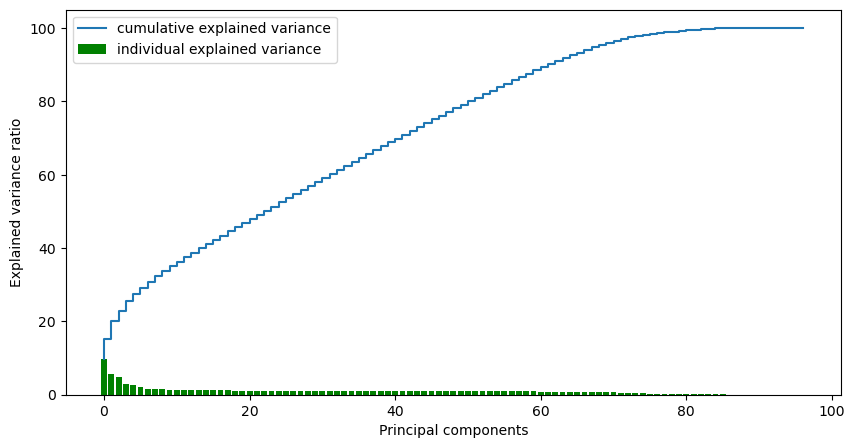

In [140]:

plt.figure(figsize=(10, 5))

plt.bar(range(len(var_exp)), var_exp, label='individual explained variance', color = 'g')

plt.step(range(len(cum_var_exp)), cum_var_exp,label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend()
plt.show()

In [142]:
from sklearn.decomposition import PCA
model=PCA(n_components=50)
x_PCA=model.fit_transform(df_scaled)
x_PCA

array([[-2.81804936e+00, -6.45370132e-01,  4.20745376e+00, ...,
        -2.71059525e-01,  1.69147848e-01,  2.87022640e-01],
       [-1.68954073e+00, -4.01315156e-01,  3.19528358e+00, ...,
        -3.07050890e-01,  2.29615139e-01,  1.37254500e-01],
       [-2.83578674e+00, -5.39709642e-01,  1.98444592e+00, ...,
        -1.70288919e-01, -2.18219939e-01,  1.34357850e-01],
       ...,
       [ 3.10576643e+00,  2.32728285e+00, -9.28419881e-01, ...,
         5.17312529e-02,  1.02821066e-01, -3.53774883e-01],
       [ 1.82261048e+00,  2.83603106e+00, -5.94054090e-01, ...,
         1.44656316e-01,  3.00030747e-03, -4.13791008e-01],
       [ 2.30619195e-02,  2.78746385e+00, -6.56723001e-01, ...,
         9.51843759e-03,  7.41810188e-02, -4.38093732e-01]])

In [152]:
x_PCA.shape

(117448, 50)

In [154]:
x_PCA=pd.DataFrame(x_PCA)
x_PCA

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-2.818049,-0.645370,4.207454,0.597590,0.568877,-1.281514,-0.583045,-0.861363,0.260144,-0.527049,...,0.032942,0.076288,0.263134,-0.270906,-0.203333,-0.327738,-0.131691,-0.271060,0.169148,0.287023
1,-1.689541,-0.401315,3.195284,1.055603,0.806033,-1.661057,-0.467808,-0.742830,0.286643,-0.634548,...,0.080091,0.040824,0.101587,-0.399642,-0.285836,-0.098071,0.242888,-0.307051,0.229615,0.137254
2,-2.835787,-0.539710,1.984446,0.826164,0.783078,-1.547527,-0.424237,-0.911880,0.198028,-0.878508,...,0.270635,0.167934,0.100850,-0.198793,-0.269995,-0.135340,-0.168023,-0.170289,-0.218220,0.134358
3,-3.365907,-0.368430,1.794248,1.607390,0.614779,-1.014939,1.153876,-1.644792,0.816058,-0.126076,...,2.743900,1.054292,1.261816,-1.740221,-0.219712,-0.994689,-1.700913,-1.912159,-2.914353,-1.747463
4,-2.313959,-1.128834,4.271242,0.320081,0.134833,-0.984230,-0.548760,-0.732469,0.256379,-0.554241,...,0.008714,0.128196,0.234884,-0.222761,-0.236137,-0.224256,-0.117157,-0.173019,0.187393,0.177360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117443,-2.942351,1.429967,-2.900655,-1.654087,1.329073,0.499862,0.309817,1.651802,0.299812,0.448597,...,-0.569670,-0.681087,-0.063720,0.148976,0.995909,-0.740990,0.418316,-0.054209,0.311958,-0.820649
117444,-0.844665,0.380980,3.204306,-2.108026,0.303464,0.177220,0.773789,0.938929,0.060227,0.868235,...,-0.429836,-0.336213,-0.140875,0.239740,0.015517,-0.206827,0.353083,-0.226573,-0.140511,-0.075694
117445,3.105766,2.327283,-0.928420,-0.085590,-1.326721,0.533075,-0.354483,1.638135,0.264250,-0.927588,...,-0.005048,0.001770,-0.498897,0.101375,0.090245,-0.507312,0.191435,0.051731,0.102821,-0.353775
117446,1.822610,2.836031,-0.594054,-0.310421,-1.510448,0.533264,-0.382445,2.003700,0.568657,-0.910051,...,-0.092633,0.065031,-0.641795,0.053211,-0.069248,-0.116457,0.655414,0.144656,0.003000,-0.413791


In [158]:
y=df_no_duplicates['round_winner']
y

0         0
1         0
2         0
3         0
4         0
         ..
122405    1
122406    1
122407    1
122408    1
122409    1
Name: round_winner, Length: 117448, dtype: int32

In [160]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_PCA, y, test_size=0.2, random_state=42)
x_train

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
114596,-2.093460,-0.083986,3.000867,0.128014,0.627718,-0.933682,0.286098,0.369823,-0.282209,0.588566,...,-0.162619,-0.102548,0.109769,-0.301803,-0.255697,-0.289066,0.437840,-0.523955,0.364552,-0.006668
49586,-0.812258,-0.970580,-2.224612,-1.001835,-1.622515,-0.844916,-0.565796,0.101330,1.915518,-0.697316,...,-0.035969,0.003678,-0.087565,0.167443,-0.089774,0.524977,-0.178997,0.527526,-0.379835,0.446883
69473,1.644326,3.842350,0.037567,2.055171,-2.412641,-0.776517,-0.473038,1.473379,-0.430828,-1.221285,...,0.229418,-0.391646,-0.978972,0.081998,0.070451,-0.021902,0.183694,0.820358,0.360355,-0.508484
56065,2.968395,-0.598212,-0.057581,-3.455535,-1.074255,0.857561,1.457333,0.896377,-0.176723,0.066533,...,0.344278,0.525213,-0.354594,-0.060041,-0.844256,0.293880,-0.042210,-0.262359,-0.308274,0.301993
19312,-0.984970,-2.037396,3.736424,-2.066076,-0.488076,0.521499,1.522600,0.641631,-0.556230,0.488842,...,-0.054158,0.204552,0.110686,0.119586,-0.221698,-0.225281,-0.256220,-0.180336,-0.129713,-0.023316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,5.155026,1.015115,-1.451344,0.752643,2.934987,0.657190,-0.833220,-0.930381,1.197852,-0.485370,...,0.362332,0.166442,0.533716,-0.188547,-0.054482,-0.012500,-0.384103,-0.468076,0.330855,-0.544990
110268,-2.537366,-2.713055,-0.220681,2.193516,3.488153,0.427502,-0.192220,-0.073369,-0.867885,-1.568230,...,0.455057,-0.092696,-0.670160,-2.021609,-2.014287,0.423684,0.773311,-0.883832,-0.928152,0.541639
103694,-6.984567,-1.425555,-3.578736,-0.875034,0.469338,-0.525577,0.964218,0.011112,0.013201,-0.292643,...,0.226825,0.258681,0.263150,-0.088809,-0.117740,-0.768523,-0.474113,-0.238969,-0.211453,0.202522
860,-6.171615,-0.340399,-3.394159,-0.632406,0.429610,-1.183282,-0.312939,-0.507686,0.686271,0.387817,...,-0.296258,-0.150675,0.346192,0.280347,-0.021297,-0.531142,-0.297706,-0.162186,-0.094670,0.085801


In [162]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
95809,-3.300127,-0.756937,-1.131112,-0.262231,0.283728,-0.422356,0.917697,1.677890,-1.035500,-0.846830,...,0.580372,0.429782,-0.292098,-0.848626,-0.359148,0.016601,-0.301560,-0.108453,-0.170646,0.114715
82783,2.855001,-1.569897,-1.881199,-0.345072,-2.581955,-0.451029,1.072563,0.633470,-1.185395,0.564189,...,0.524104,0.370173,-0.907250,-0.143145,-0.744258,-0.061018,-1.644196,-0.546840,0.369295,0.669759
96857,-0.814499,2.762702,-0.765160,-0.753936,0.994066,1.306461,1.671187,-0.866089,-0.826571,0.476931,...,0.331275,-0.375015,-0.163356,0.342905,-0.141918,-0.175249,0.348288,-0.253826,0.473921,-0.432434
30217,-4.452100,1.015548,-2.494068,-0.759293,0.610682,0.329210,0.762441,-0.897961,-0.051547,1.607586,...,-0.302350,-0.062476,0.200284,0.381136,-0.359989,0.512028,0.051705,-0.554275,0.229945,-0.194817
50059,0.605384,2.858775,-0.338377,-1.026030,2.452181,1.866286,-0.690086,3.032858,0.857559,0.263583,...,-0.780724,0.068244,0.570900,-1.231310,0.227753,-0.099081,0.429845,-0.387219,0.646791,-0.764006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54997,-1.742325,-0.442871,3.042869,1.523312,0.686153,-2.323927,-0.203001,-0.711736,-0.073175,0.646898,...,0.201316,2.270987,-0.771981,-1.072185,1.202878,-0.885021,0.305263,0.917186,-0.769477,1.174672
100166,3.261660,0.201739,-1.657902,-0.406648,-0.577578,-1.141462,-0.517554,-1.071153,-0.600201,1.378233,...,0.191544,-0.340204,-0.398549,0.187586,-0.553715,0.226458,-0.781983,-0.010695,0.374094,0.402487
100548,-2.316848,-1.126574,4.319956,0.283204,0.213911,-1.014175,-0.542430,-0.871521,0.089991,-0.607013,...,0.120864,0.176283,0.161007,-0.031197,-0.268693,-0.122098,-0.337866,-0.100058,-0.204401,0.083835
47557,1.617669,2.456180,0.344722,0.461630,-0.912984,-0.949951,-1.007165,2.532453,1.536559,0.067267,...,-0.628262,0.058811,-0.168230,-0.107184,-0.119597,-0.018873,-0.007033,-0.170085,-0.280577,0.048359


In [164]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [166]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 1, 1])

In [170]:

from sklearn.metrics import *
accuracy_score=accuracy_score(y_test,y_pred)
accuracy_score

0.9453810131971051

In [172]:
confusion_matrix(y_test,y_pred)

array([[10888,   600],
       [  683, 11319]], dtype=int64)

In [174]:
accuracy=(10888+11319)/(10888+600+683+11319)
accuracy

0.9453810131971051

In [178]:
precision0=10888/(10888+683)
precision0

0.9409731224613257

In [182]:
precision1=11319/(11319+600)
precision1

0.9496602063931537